# EDA

## 1. Importar paquetes

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

%config IPCompleter.greedy = True

import warnings
warnings.filterwarnings('ignore')

## 2. Cargar los datos

In [20]:
ruta = 'C:/Users/matia/OneDrive/Escritorio/Churn_Bank'

In [21]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'
trabajo = 'trabajo_resultado_calidad.pickle'

In [22]:
cat = pd.read_pickle(ruta + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta + '/02_Datos/03_Trabajo/' + nombre_num)
df = pd.read_pickle(ruta + '/02_Datos/03_Trabajo/' + trabajo)

## 3. EDA categoricas

### 3.1 Analisis grafico

In [23]:
def eda_categoricas(cat):
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    ax = ax.flat

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

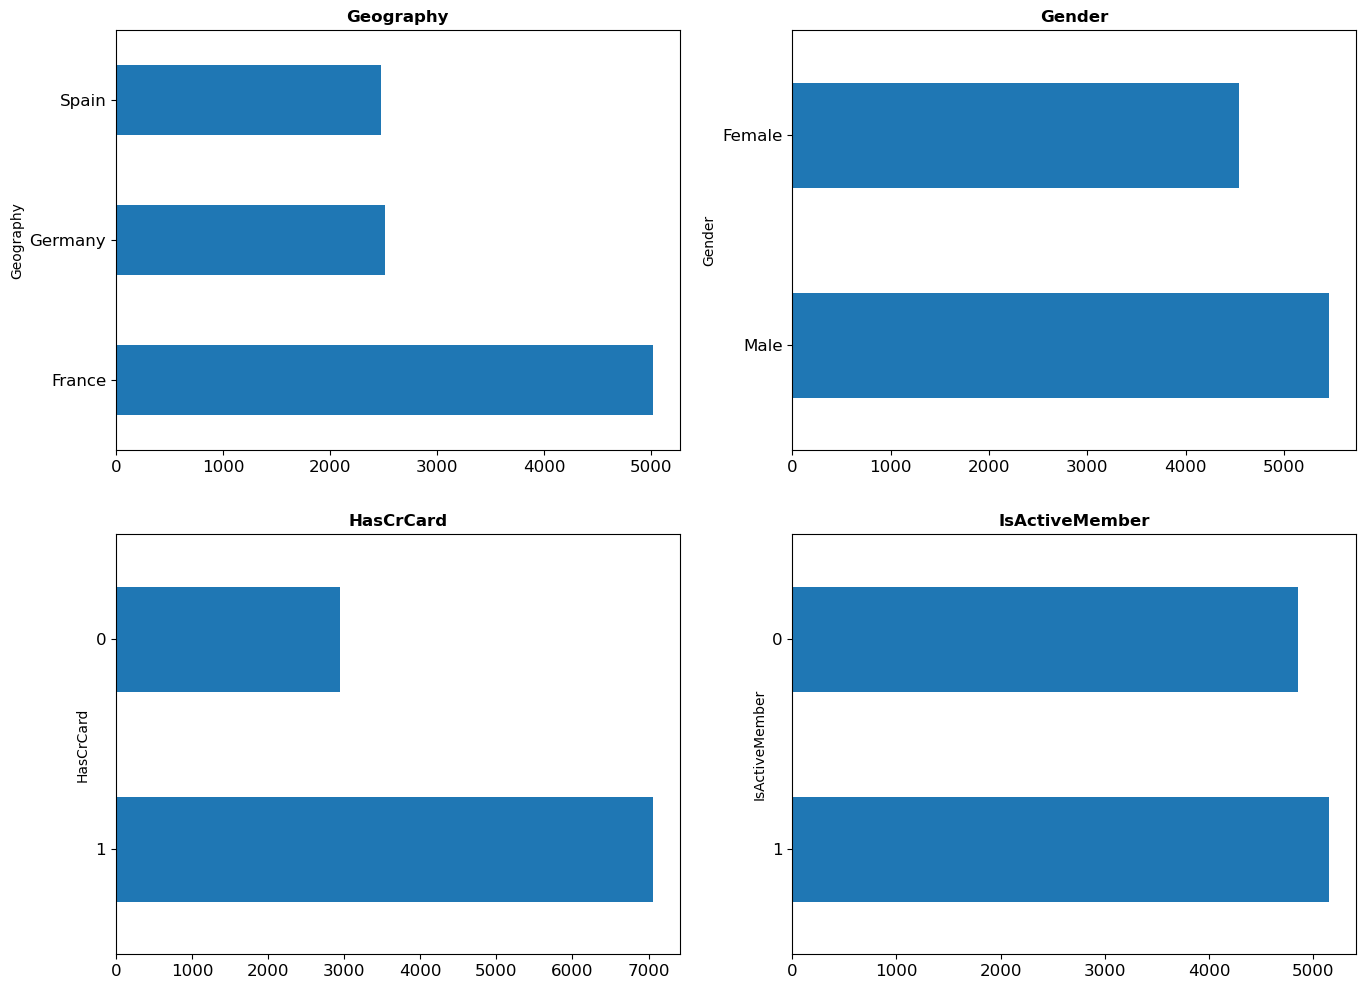

In [24]:
eda_categoricas(cat)

Como se habia apreciado en la etapa anterior, la mayoria de usuarios es de Francia y poseen una tarjeta de credito. Respecto a las otras variables no hay alguna distinción significativa.

## 4. EDA Numéricas

### 4.1 Análisis estadístico

In [25]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    
    #Agregar la mediana
    estadisticos['median'] = num.median()
    #Dejar la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    
    return(estadisticos)

In [26]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,652.00,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,37.00,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,5.00,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,97198.54,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,1.00,0.58,1.00,1.00,1.00,2.00,4.00
EstimatedSalary,10000.00,100090.24,100193.91,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.00,0.40,0.00,0.00,0.00,0.00,1.00


### 4.2 Análisis gráfico

In [27]:
def eda_numericas(num):
    from math import ceil
    filas = ceil(num.shape[1] / 2)
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat 
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

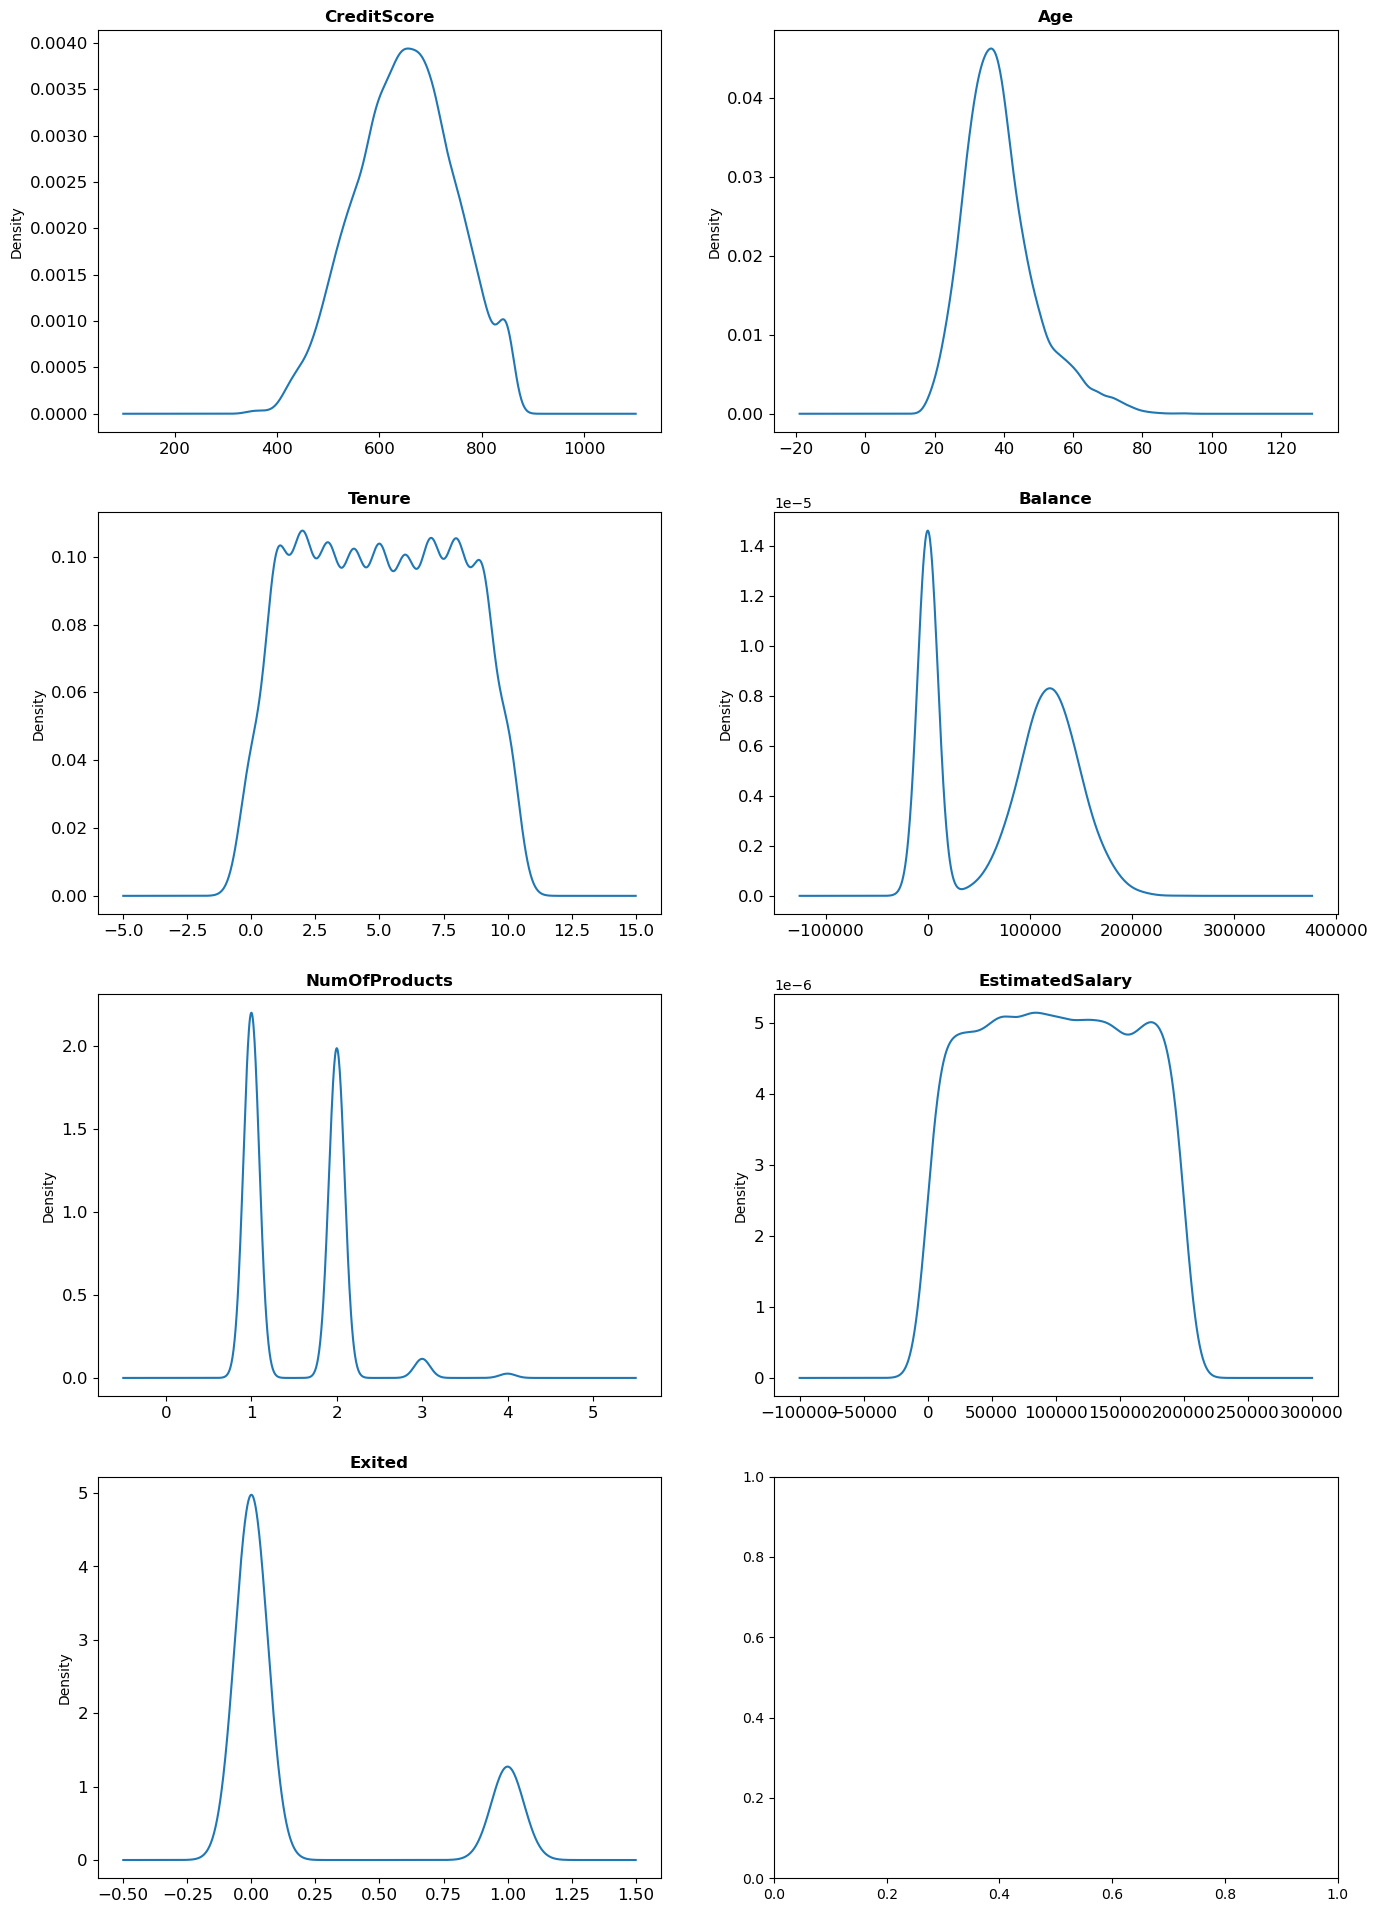

In [28]:
eda_numericas(num)

Las variables Balance y NumOfProducts muestran más de una distribución, tal que los usuarios estan repartidos en estas concentraciones.

## 5. Cual es el perfil de clientes que abandona el banco?

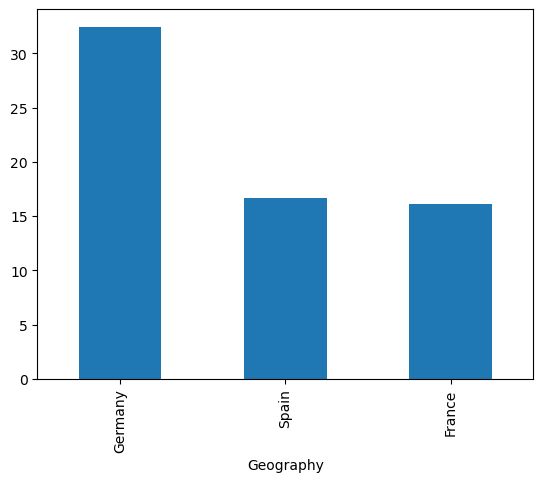

In [29]:
temp = df.groupby('Geography').Exited.mean().sort_values(ascending = False) * 100
temp.plot.bar();

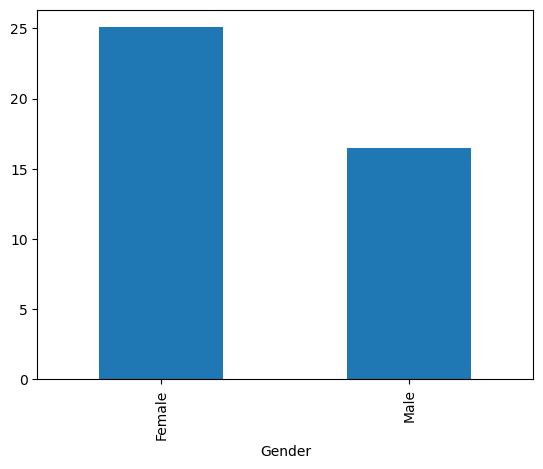

In [30]:
temp = df.groupby('Gender').Exited.mean().sort_values(ascending = False) * 100
temp.plot.bar();

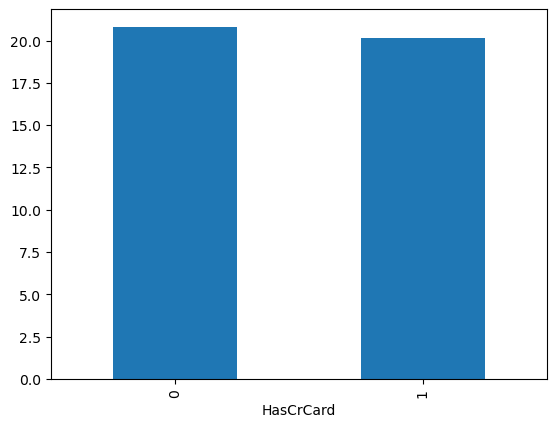

In [31]:
temp = df.groupby('HasCrCard').Exited.mean().sort_values(ascending = False) * 100
temp.plot.bar();

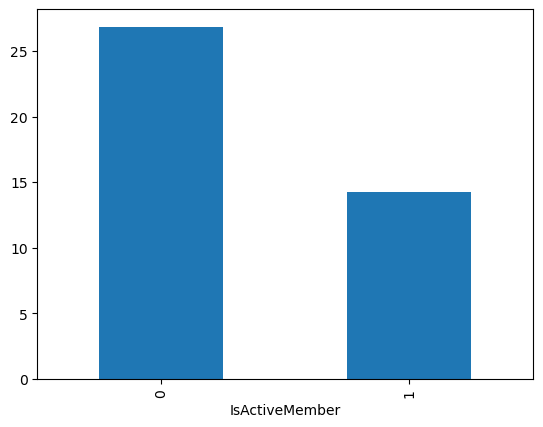

In [32]:
temp = df.groupby('IsActiveMember').Exited.mean().sort_values(ascending = False) * 100
temp.plot.bar();

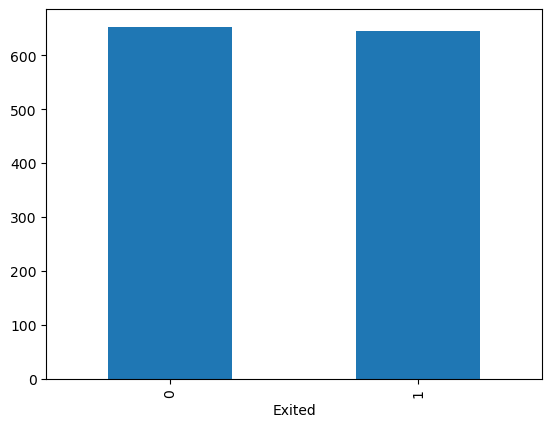

In [33]:
temp = df.groupby('Exited').CreditScore.median()
temp.plot.bar();

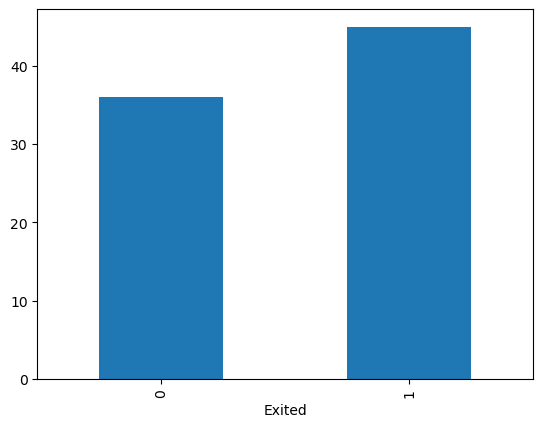

In [34]:
temp = df.groupby('Exited').Age.median()
temp.plot.bar();

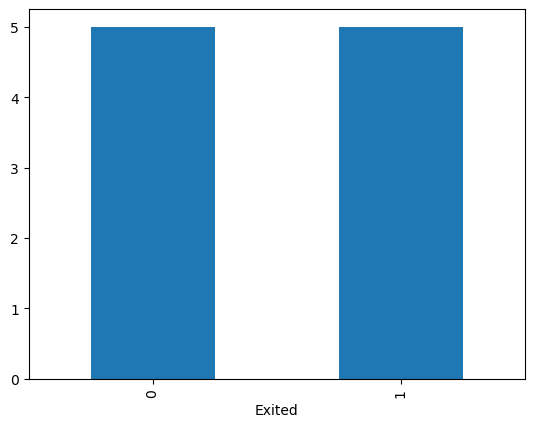

In [35]:
temp = df.groupby('Exited').Tenure.median()
temp.plot.bar();

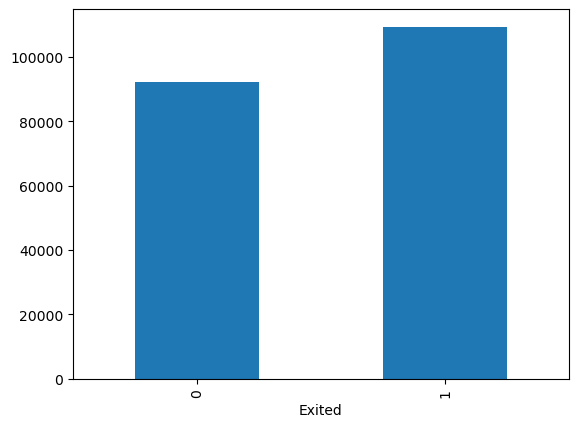

In [36]:
temp = df.groupby('Exited').Balance.median()
temp.plot.bar();

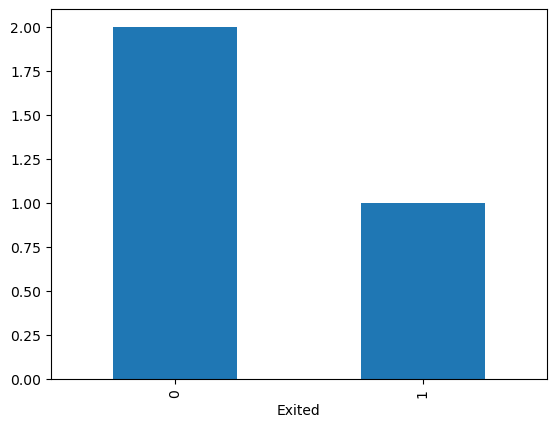

In [37]:
temp = df.groupby('Exited').NumOfProducts.median()
temp.plot.bar();

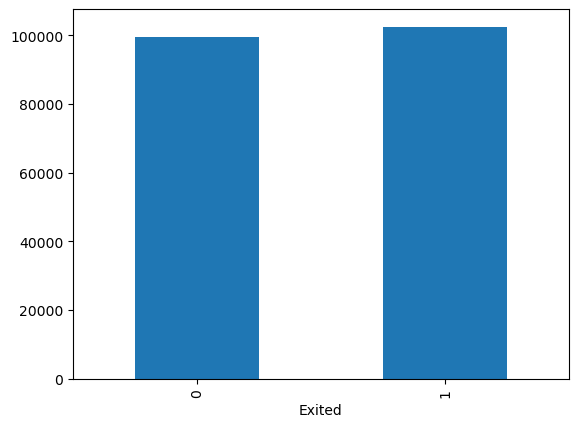

In [38]:
temp = df.groupby('Exited').EstimatedSalary.median()
temp.plot.bar();

## 6. Conclusiones

 Las caracteristicas que posee los clientes que abandonan el banco dado el EDA son las siguientes:

1.- Residen o son originarios de Alemania.

2.- En su mayoria de genero fenemino.

3.- No son miembros activos.

4.- El rango etario se concentran alrededor de los 40 años, tanto hacia menos edad como hacia más.

5.- Tienen un Balance superior a 100000

6.- Tienen, como maximo, 2 productos afiliados al banco.